In [1]:
import test_config as cfg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import json
import os, os.path
import pickle
import io
from PIL import Image
from io import BytesIO

import skimage
import skimage.io, skimage.transform

import scipy.fftpack

In [2]:
src_fname = os.path.join(cfg.sample_path, os.listdir(cfg.sample_path)[6])
print(src_fname)
src = skimage.io.imread(src_fname, as_grey=True)

D:/Data/bujo_sample\20190309_125151.jpg


In [3]:
src2 = skimage.transform.rescale(src, scale=0.05)

C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


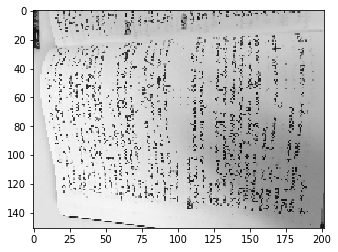

In [4]:
plt.imshow(src2, cmap='gray')

In [5]:
theta = np.linspace(-90., 90., max(src2.shape), endpoint=False)
src2p2 = np.power(src2, 2.0)

In [6]:
%%time
src2t = skimage.transform.radon(src2, theta=theta, circle=True)

Wall time: 253 ms


C:\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:69: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


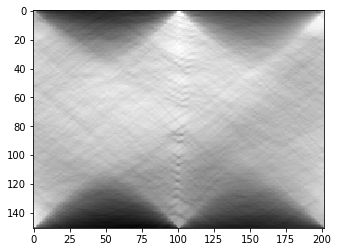

In [7]:
plt.imshow(src2t, cmap='gray')

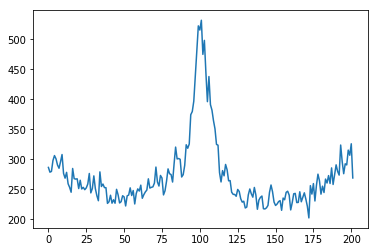

In [8]:
src3 = np.sum(np.abs(src2t[1:]-src2t[:-1]), axis=0)# / (np.max(src2t, axis=0)-np.min(src2t, axis=0))
plt.plot(src3)
src3ind = np.argmax(src3)

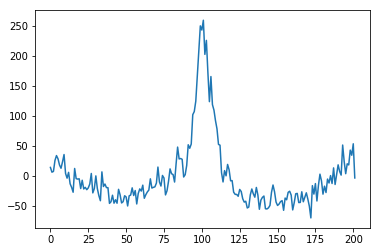

In [10]:
plt.plot(src3-np.mean(src3))

In [11]:
def process_local_maxima(src, ind, i_left, i_right, quota):
    ileft = i_left
    iright = i_right
    while ileft > 0 and src[ileft] >= src[ind] * quota:
        ileft -= 1
        
    while iright < len(src)-1 and src[iright] >= src[ind] * quota:
        iright += 1
    return (ileft, iright)

In [14]:
process_local_maxima(src3 - np.mean(src3), src3ind, src3ind, src3ind, 0.15)

(90, 113)

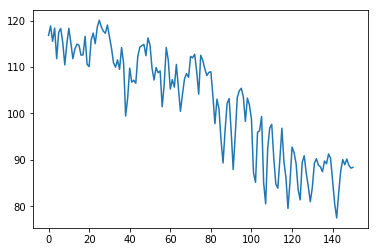

In [12]:
plt.plot(src2t[:, src3ind])

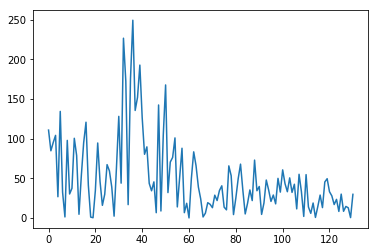

In [13]:
src4 = scipy.fftpack.dct(src2t[:, src3ind], type=2)
plt.plot(np.abs(src4[20:]))